## Data source: Spotify API

## What is an API?
<p>An API, or Application Programming Interface, is a server that you can use to retrieve and send data to using code. APIs are most commonly used to retrieve data, and that will be the focus of this beginner tutorial.</p>

When we want to receive data from an API, we need to make a request. Requests are used all over the web. For instance, when you visited this blog post, your web browser made a request to the Dataquest web server, which responded with the content of this web page. 

API requests work in exactly the same way – you make a request to an API server for data, and it responds to your request.

## AUDIO FEATURES
For every track on their platform, Spotify provides data for thirteen Audio Features. The Spotify Web API developer guide defines them as follows:

- <b>Danceability:</b> Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

- <b>Valence:</b> Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- <b>Energy:</b> Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

- <b>Tempo:</b> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.

- <b>Loudness:</b> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

- <b>Speechiness:</b> This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

- <b>Instrumentalness:</b> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.

- <b>Liveness:</b> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

- <b>Acousticness:</b> A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

- <b>Key:</b> The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

- <b>Mode:</b> Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- <b>Duration:</b> The duration of the track in milliseconds.

- <b>Time Signature:</b> An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- <b>tempo:</b> The overall estimated tempo of a track in beats per minute (BPM).
valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive.


https://developer.spotify.com/dashboard/

Spotify dashboard link
login with your credentials
#### copy your Client id and client secret key

-------------------------------------------------------------------------------
https://developer.spotify.com/dashboard/    -----> login here to get clientid and secret key for api




In [220]:
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np

#insert client_id and client_secret key here.
auth_mngr = SpotifyClientCredentials(client_id='client_cred', 
client_secret='c_sec')
sp = spotipy.Spotify(auth_manager= auth_mngr)

In [2]:
import matplotlib.pyplot as plt

## Spotify playlist
- <a href = "https://open.spotify.com/playlist/37i9dQZF1DX9ukdrXQLJGZ">2015 playlist</a>
- <a href = "https://open.spotify.com/playlist/37i9dQZF1DX8XZ6AUo9R4R">2016 playlist</a>
- <a href = "https://open.spotify.com/playlist/37i9dQZF1DWTE7dVUebpUW">2017 playlist</a>
- <a href = "https://open.spotify.com/playlist/37i9dQZF1DXe2bobNYDtW8">2018 playlist</a>
- <a href = "https://open.spotify.com/playlist/37i9dQZF1DWVRSukIED0e9">2019 playlist</a>
- <a href = "https://open.spotify.com/playlist/2fmTTbBkXi8pewbUvG3CeZ">2020 playlist</a>
- <a href = "https://open.spotify.com/playlist/2vvCxv5GAT1oO4bu8lLegi">2016 tik tok hits playlist</a>

## Getting 2020 playlist

In [128]:
## Geting 2020 Playlist

def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('NiCampos', '2fmTTbBkXi8pewbUvG3CeZ') # top 2020 songs
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  key = features[0]['key']
  mode = features[0]['mode']
  valence = features[0]['valence']


  track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature,key,mode,valence]
  return track
  
import time
import pandas as pd
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df20 = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 
'popularity',  'acousticness', 'danceability', 'energy', 'instrumentalness', 
'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','key','mode','valence'])
df20

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,key,mode,valence
0,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,201573,18,0.00147,0.513,0.796,0.000209,0.0938,-4.075,0.0629,171.017,4,1,1,0.345
1,Break My Heart,Break My Heart,Dua Lipa,2020-03-25,221820,72,0.16700,0.730,0.729,0.000001,0.3490,-3.434,0.0886,113.012,4,4,0,0.467
2,Watermelon Sugar,Fine Line,Harry Styles,2019-12-13,174000,89,0.12200,0.548,0.816,0.000000,0.3350,-4.209,0.0465,95.390,4,0,1,0.557
3,Say So,Hot Pink,Doja Cat,2019-11-07,237893,82,0.26400,0.787,0.673,0.000003,0.0904,-4.583,0.1590,110.962,4,11,0,0.779
4,The Box,Please Excuse Me for Being Antisocial,Roddy Ricch,2019-12-06,196652,83,0.10400,0.896,0.586,0.000000,0.7900,-6.687,0.0559,116.971,4,10,0,0.642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,I’m Ready (with Demi Lovato),I’m Ready (with Demi Lovato),Sam Smith,2020-04-16,200838,67,0.00346,0.501,0.674,0.000036,0.2820,-6.363,0.0408,155.051,4,5,1,0.152
96,HOLIDAY,HOLIDAY,Lil Nas X,2020-11-13,154997,83,0.12000,0.810,0.511,0.000000,0.0832,-6.924,0.1640,151.947,4,5,0,0.837
97,goosebumps,Birds In The Trap Sing McKnight,Travis Scott,2016-09-16,243836,86,0.08470,0.841,0.728,0.000000,0.1490,-3.370,0.0484,130.049,4,7,1,0.430
98,Mood Swings (feat. Lil Tjay),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,213333,81,0.48700,0.480,0.602,0.000000,0.0848,-6.335,0.3680,179.798,4,10,0,0.269


## Getting 2019 playlist

In [129]:
## Geting 2019 Playlist

def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Spotify', '2fmTTbBkXi8pewbUvG3CeZ') # top 2019 songs
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  key = features[0]['key']
  mode = features[0]['mode']
  time_signature = features[0]['time_signature']
  valence = features[0]['valence']

  track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature,key,mode,valence]
  return track
  
import time
import pandas as pd
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df19 = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 
'popularity',  'acousticness', 'danceability', 'energy', 'instrumentalness', 
'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','key','mode','valence'])
df19

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,key,mode,valence
0,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,201573,18,0.00147,0.513,0.796,0.000209,0.0938,-4.075,0.0629,171.017,4,1,1,0.345
1,Break My Heart,Break My Heart,Dua Lipa,2020-03-25,221820,72,0.16700,0.730,0.729,0.000001,0.3490,-3.434,0.0886,113.012,4,4,0,0.467
2,Watermelon Sugar,Fine Line,Harry Styles,2019-12-13,174000,89,0.12200,0.548,0.816,0.000000,0.3350,-4.209,0.0465,95.390,4,0,1,0.557
3,Say So,Hot Pink,Doja Cat,2019-11-07,237893,82,0.26400,0.787,0.673,0.000003,0.0904,-4.583,0.1590,110.962,4,11,0,0.779
4,The Box,Please Excuse Me for Being Antisocial,Roddy Ricch,2019-12-06,196652,83,0.10400,0.896,0.586,0.000000,0.7900,-6.687,0.0559,116.971,4,10,0,0.642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,I’m Ready (with Demi Lovato),I’m Ready (with Demi Lovato),Sam Smith,2020-04-16,200838,67,0.00346,0.501,0.674,0.000036,0.2820,-6.363,0.0408,155.051,4,5,1,0.152
96,HOLIDAY,HOLIDAY,Lil Nas X,2020-11-13,154997,83,0.12000,0.810,0.511,0.000000,0.0832,-6.924,0.1640,151.947,4,5,0,0.837
97,goosebumps,Birds In The Trap Sing McKnight,Travis Scott,2016-09-16,243836,86,0.08470,0.841,0.728,0.000000,0.1490,-3.370,0.0484,130.049,4,7,1,0.430
98,Mood Swings (feat. Lil Tjay),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,213333,81,0.48700,0.480,0.602,0.000000,0.0848,-6.335,0.3680,179.798,4,10,0,0.269


## Getting the 2018 Playlist 

In [130]:
## Geting 2018 Playlist

def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Spotify', '37i9dQZF1DXe2bobNYDtW8') # top 2018 songs
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  key = features[0]['key']
  mode = features[0]['mode']
  time_signature = features[0]['time_signature']
  valence = features[0]['valence']

 

  track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature,key,mode,valence]
  return track
  
import time
import pandas as pd
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df18 = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity',  'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','key','mode','valence'])

In [131]:
df18

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,key,mode,valence
0,God's Plan,Scorpion,Drake,2018-06-29,198973,82,0.0332,0.754,0.449,0.000083,0.5520,-9.211,0.1090,77.169,4,7,1,0.357
1,rockstar (feat. 21 Savage),beerbongs & bentleys,Post Malone,2018-04-27,218146,84,0.1240,0.585,0.520,0.000070,0.1310,-6.136,0.0712,159.801,4,5,0,0.129
2,Perfect,÷ (Deluxe),Ed Sheeran,2017-03-03,263400,87,0.1630,0.599,0.448,0.000000,0.1060,-6.312,0.0232,95.050,3,8,1,0.168
3,I Like Me Better,I met you when I was 18. (the playlist),Lauv,2018-05-31,197436,83,0.5350,0.752,0.505,0.000003,0.1040,-7.621,0.2530,91.970,4,9,1,0.419
4,Havana (feat. Young Thug),Camila,Camila Cabello,2018-01-12,217306,81,0.1840,0.765,0.523,0.000036,0.1320,-4.333,0.0300,104.988,4,2,1,0.394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mo Bamba,MUDBOY,Sheck Wes,2018-10-05,183906,77,0.1940,0.729,0.625,0.009860,0.2480,-5.266,0.0315,146.034,4,4,1,0.261
96,Be Careful,Invasion of Privacy,Cardi B,2018-04-06,210787,67,0.0256,0.820,0.568,0.000000,0.0952,-8.230,0.4110,152.279,4,6,0,0.535
97,Simple,Can't Say I Ain't Country,Florida Georgia Line,2019-02-15,185200,72,0.0791,0.362,0.882,0.000000,0.1500,-3.717,0.0973,199.811,4,3,1,0.864
98,Miss You (with Major Lazer & Tory Lanez),Miss You (with Major Lazer & Tory Lanez),Cashmere Cat,2018-01-16,186231,58,0.2500,0.747,0.641,0.001070,0.1060,-4.502,0.0925,100.028,4,1,1,0.453


## Getting 2017 Playlist

In [132]:
## Geting 2017 Playlist
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Spotify', '37i9dQZF1DWTE7dVUebpUW') #top 2017 songs

def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  tempo = features[0]['tempo']
  key = features[0]['key']
  mode = features[0]['mode']
  time_signature = features[0]['time_signature']
  valence = features[0]['valence']



  track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature,key,mode,valence]
  return track

import time
import pandas as pd
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df17 = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity',  'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','key','mode','valence'])
df17

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,key,mode,valence
0,Shape of You,÷ (Deluxe),Ed Sheeran,2017-03-03,233712,86,0.5810,0.825,0.652,0.000000,0.0931,-3.183,0.0802,95.977,4,1,0,0.931
1,rockstar,rockstar,Post Malone,2017-09-15,218320,1,0.1300,0.577,0.522,0.000090,0.1420,-6.594,0.0984,159.772,4,5,0,0.119
2,Despacito (Featuring Daddy Yankee),Despacito (Featuring Daddy Yankee),Luis Fonsi,2017-01-13,228200,1,0.2090,0.660,0.786,0.000000,0.1120,-4.757,0.1700,177.833,4,2,1,0.846
3,Closer,Closer,The Chainsmokers,2016-07-29,244960,85,0.4140,0.748,0.524,0.000000,0.1110,-5.599,0.0338,95.010,4,8,1,0.661
4,Rockabye (feat. Sean Paul & Anne-Marie),Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2016-10-21,251088,75,0.4060,0.720,0.763,0.000000,0.1800,-4.068,0.0523,101.965,4,9,0,0.742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Now Or Never,hopeless fountain kingdom (Deluxe),Halsey,2017-06-02,214801,68,0.1070,0.670,0.585,0.000001,0.1310,-4.861,0.0354,110.030,4,6,0,0.447
96,Whatever It Takes,Evolve,Imagine Dragons,2017-06-23,201240,80,0.0362,0.672,0.655,0.000000,0.1170,-5.021,0.0311,134.945,4,10,0,0.556
97,Love On The Brain,ANTI,Rihanna,2016-01-28,224000,0,0.0717,0.509,0.637,0.000011,0.0789,-4.830,0.0471,172.006,3,4,0,0.378
98,First Time,First Time,Kygo,2017-04-28,193511,65,0.1970,0.633,0.592,0.000000,0.0990,-7.245,0.1120,90.066,4,0,0,0.679


## Getting 2016 Playlist

In [133]:
## Geting 2016 Playlist
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Spotify', '37i9dQZF1DX8XZ6AUo9R4R') #top 2017 songs

def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  key = features[0]['key']
  mode = features[0]['mode']
  time_signature = features[0]['time_signature']
  valence = features[0]['valence']



  track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature,key,mode,valence]
  return track

import time
import pandas as pd
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df16 = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity',  'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','key','mode','valence'])
df16

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,key,mode,valence
0,Starboy,Starboy,The Weeknd,2016-11-25,230453,1,0.16500,0.681,0.594,0.000003,0.1340,-7.028,0.2820,186.054,4,7,1,0.535
1,One Dance,Views,Drake,2016-05-06,173986,83,0.00776,0.792,0.625,0.001800,0.3290,-5.609,0.0536,103.967,4,1,1,0.370
2,Love Yourself,Purpose (Deluxe),Justin Bieber,2015-11-13,233720,1,0.83500,0.609,0.378,0.000000,0.2800,-9.828,0.4380,100.418,4,4,1,0.515
3,Closer,Closer,The Chainsmokers,2016-07-29,244960,85,0.41400,0.748,0.524,0.000000,0.1110,-5.599,0.0338,95.010,4,8,1,0.661
4,Hello,Hello,Adele,2015-10-23,295502,2,0.32900,0.471,0.431,0.000000,0.0854,-6.129,0.0342,157.980,4,5,0,0.289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Fast Car,Fast Car,Jonas Blue,2015-12-04,212424,1,0.45300,0.459,0.587,0.000000,0.3070,-6.983,0.0785,113.901,4,9,1,0.581
96,Sexual,Sexual,NEIKED,2016,188888,65,0.06920,0.797,0.567,0.000000,0.0705,-7.503,0.0651,108.024,4,2,1,0.843
97,Heathens,Heathens,Twenty One Pilots,2016-06-16,195920,81,0.08410,0.732,0.396,0.000036,0.1050,-9.348,0.0286,90.024,4,4,0,0.548
98,Alone,Alone,Marshmello,2016-05-13,273802,73,0.02410,0.631,0.953,0.015500,0.1080,-3.739,0.0343,141.990,4,2,1,0.422


## Getting 2015 Playlist

In [134]:
## Geting 2015 Playlist
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Spotify', '37i9dQZF1DX9ukdrXQLJGZ') #top 2015 songs

def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  key = features[0]['key']
  mode = features[0]['mode']
  time_signature = features[0]['time_signature']
  valence = features[0]['valence']


  track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature,key,mode,valence]
  return track

import time
import pandas as pd
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df15 = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity',  'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','key','mode','valence'])
df15

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,key,mode,valence
0,Uptown Funk (feat. Bruno Mars),Uptown Special,Mark Ronson,2015-01-12,269666,82,0.00801,0.856,0.609,0.000082,0.0344,-7.223,0.0824,114.988,4,0,1,0.928
1,Thinking out Loud,x (Deluxe Edition),Ed Sheeran,2014-06-21,281560,83,0.47400,0.781,0.445,0.000000,0.1840,-6.061,0.0295,78.998,4,2,1,0.591
2,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),Wiz Khalifa,2015,229525,81,0.36900,0.689,0.481,0.000001,0.0649,-7.503,0.0815,80.025,4,10,1,0.283
3,What Do You Mean?,Purpose (Deluxe),Justin Bieber,2015-11-13,205680,78,0.59000,0.845,0.567,0.001420,0.0811,-8.118,0.0956,125.020,4,5,0,0.793
4,Lean On (feat. MØ & DJ Snake),Peace Is The Mission : Extended,Major Lazer,2015-11-27,176561,74,0.00346,0.723,0.809,0.001230,0.5650,-3.081,0.0625,98.007,4,7,0,0.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,All Eyes on You (feat. Chris Brown & Nicki Minaj),Dreams Worth More Than Money,Meek Mill,2015-06-29,223973,69,0.02420,0.589,0.658,0.000000,0.1180,-5.288,0.2030,77.521,4,11,0,0.251
96,Sugar (feat. Francesco Yates),Sugar,Robin Schulz,2015-09-25,219043,77,0.01850,0.636,0.815,0.000000,0.1630,-5.098,0.0581,123.063,4,5,0,0.636
97,Hold My Hand,Hold My Hand,Jess Glynne,2015-02-24,227343,61,0.00159,0.642,0.823,0.000000,0.0776,-5.717,0.0289,122.977,4,0,1,0.431
98,Watch Me (Whip / Nae Nae),Watch Me (Whip / Nae Nae),Silentó,2015-05-04,185131,0,0.23400,0.819,0.768,0.000000,0.3340,-8.522,0.1340,139.982,4,8,1,0.964


## References 
https://machinelearningknowledge.ai/tutorial-how-to-use-spotipy-api-to-scrape-spotify-data/#How_to_get_the_URI_from_Spotify_Playlist

## Checking null Values

In [235]:
print('2015')
print(df15.isna().sum())
print('2016')

print(df16.isna().sum())
print('2017')

print(df17.isna().sum())
print('2018')

print(df18.isna().sum())
print('2019')

print(df19.isna().sum())
print('2020')

print(df20.isna().sum())

2015
name                0
album               0
artist              0
release_date        0
year                0
month               0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
key                 0
mode                0
valence             0
dtype: int64
2016
name                0
album               0
artist              0
release_date        0
year                0
month               0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
key                 0
mode                0
valence             0
dtype: int64
2017
name                0
album               0
artist              0
release_date 

- No null value present.
- Date is not stored as Date time object so converting it to date time.

## Converting date to datetime format
Extracting month and year to Dataframe

In [135]:
# converting date to datetime format
df20['release_date'] = pd.to_datetime(df20['release_date'], format='%Y-%m-%d')

#addind month and year to the data frame
year = df20['release_date'].apply(lambda x : x.year)
month = df20['release_date'].apply(lambda x : x.month)
df20.insert(loc=4, column='year', value=year) 
df20.insert(loc=5, column='month', value=month)
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              100 non-null    object        
 1   album             100 non-null    object        
 2   artist            100 non-null    object        
 3   release_date      100 non-null    datetime64[ns]
 4   year              100 non-null    int64         
 5   month             100 non-null    int64         
 6   length            100 non-null    int64         
 7   popularity        100 non-null    int64         
 8   acousticness      100 non-null    float64       
 9   danceability      100 non-null    float64       
 10  energy            100 non-null    float64       
 11  instrumentalness  100 non-null    float64       
 12  liveness          100 non-null    float64       
 13  loudness          100 non-null    float64       
 14  speechiness       100 non-n

In [136]:
# converting date to datetime format
df19['release_date'] = pd.to_datetime(df19['release_date'], format='%Y-%m-%d')

#addind month and year to the data frame
year = df19['release_date'].apply(lambda x : x.year)
month = df19['release_date'].apply(lambda x : x.month)
df19.insert(loc=4, column='year', value=year) 
df19.insert(loc=5, column='month', value=month)
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              100 non-null    object        
 1   album             100 non-null    object        
 2   artist            100 non-null    object        
 3   release_date      100 non-null    datetime64[ns]
 4   year              100 non-null    int64         
 5   month             100 non-null    int64         
 6   length            100 non-null    int64         
 7   popularity        100 non-null    int64         
 8   acousticness      100 non-null    float64       
 9   danceability      100 non-null    float64       
 10  energy            100 non-null    float64       
 11  instrumentalness  100 non-null    float64       
 12  liveness          100 non-null    float64       
 13  loudness          100 non-null    float64       
 14  speechiness       100 non-n

In [137]:
# converting date to datetime format
df18['release_date'] = pd.to_datetime(df18['release_date'], format='%Y-%m-%d')

#addind month and year to the data frame
year = df18['release_date'].apply(lambda x : x.year)
month = df18['release_date'].apply(lambda x : x.month)
df18.insert(loc=4, column='year', value=year) 
df18.insert(loc=5, column='month', value=month)
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              100 non-null    object        
 1   album             100 non-null    object        
 2   artist            100 non-null    object        
 3   release_date      100 non-null    datetime64[ns]
 4   year              100 non-null    int64         
 5   month             100 non-null    int64         
 6   length            100 non-null    int64         
 7   popularity        100 non-null    int64         
 8   acousticness      100 non-null    float64       
 9   danceability      100 non-null    float64       
 10  energy            100 non-null    float64       
 11  instrumentalness  100 non-null    float64       
 12  liveness          100 non-null    float64       
 13  loudness          100 non-null    float64       
 14  speechiness       100 non-n

In [138]:
# converting date to datetime format
df17['release_date'] = pd.to_datetime(df17['release_date'], format='%Y-%m-%d')

#addind month and year to the data frame
year = df17['release_date'].apply(lambda x : x.year)
month = df17['release_date'].apply(lambda x : x.month)
df17.insert(loc=4, column='year', value=year) 
df17.insert(loc=5, column='month', value=month)
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              100 non-null    object        
 1   album             100 non-null    object        
 2   artist            100 non-null    object        
 3   release_date      100 non-null    datetime64[ns]
 4   year              100 non-null    int64         
 5   month             100 non-null    int64         
 6   length            100 non-null    int64         
 7   popularity        100 non-null    int64         
 8   acousticness      100 non-null    float64       
 9   danceability      100 non-null    float64       
 10  energy            100 non-null    float64       
 11  instrumentalness  100 non-null    float64       
 12  liveness          100 non-null    float64       
 13  loudness          100 non-null    float64       
 14  speechiness       100 non-n

In [139]:
# converting date to datetime format
df16['release_date'] = pd.to_datetime(df18['release_date'], format='%Y-%m-%d')

#addind month and year to the data frame
year = df16['release_date'].apply(lambda x : x.year)
month = df16['release_date'].apply(lambda x : x.month)
df16.insert(loc=4, column='year', value=year) 
df16.insert(loc=5, column='month', value=month)
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              100 non-null    object        
 1   album             100 non-null    object        
 2   artist            100 non-null    object        
 3   release_date      100 non-null    datetime64[ns]
 4   year              100 non-null    int64         
 5   month             100 non-null    int64         
 6   length            100 non-null    int64         
 7   popularity        100 non-null    int64         
 8   acousticness      100 non-null    float64       
 9   danceability      100 non-null    float64       
 10  energy            100 non-null    float64       
 11  instrumentalness  100 non-null    float64       
 12  liveness          100 non-null    float64       
 13  loudness          100 non-null    float64       
 14  speechiness       100 non-n

In [140]:
# converting date to datetime format
df15['release_date'] = pd.to_datetime(df15['release_date'], format='%Y-%m-%d')

#addind month and year to the data frame
year = df15['release_date'].apply(lambda x : x.year)
month = df15['release_date'].apply(lambda x : x.month)
df15.insert(loc=4, column='year', value=year) 
df15.insert(loc=5, column='month', value=month)
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              100 non-null    object        
 1   album             100 non-null    object        
 2   artist            100 non-null    object        
 3   release_date      100 non-null    datetime64[ns]
 4   year              100 non-null    int64         
 5   month             100 non-null    int64         
 6   length            100 non-null    int64         
 7   popularity        100 non-null    int64         
 8   acousticness      100 non-null    float64       
 9   danceability      100 non-null    float64       
 10  energy            100 non-null    float64       
 11  instrumentalness  100 non-null    float64       
 12  liveness          100 non-null    float64       
 13  loudness          100 non-null    float64       
 14  speechiness       100 non-n

## Finding which Artist had most TOP 100 songs¶
for each year (Just out of curiosity)

In [141]:
art15 = df15.groupby("artist")["artist"].count().sort_values(ascending=False)
art15.head()

artist
Selena Gomez      5
Adele             4
Taylor Swift      4
The Weeknd        4
Meghan Trainor    3
Name: artist, dtype: int64

In [142]:
art16 = df16.groupby("artist")["artist"].count().sort_values(ascending=False)
art16.head()

artist
Drake                4
Adele                3
Twenty One Pilots    3
Ariana Grande        3
Justin Bieber        3
Name: artist, dtype: int64

In [143]:
art17 = df17.groupby("artist")["artist"].count().sort_values(ascending=False)
art17.head()

artist
Ed Sheeran         5
Maroon 5           3
Imagine Dragons    3
Zara Larsson       3
Kygo               3
Name: artist, dtype: int64

In [144]:
art18 = df18.groupby("artist")["artist"].count().sort_values(ascending=False)
art18.head()

artist
Marshmello        4
Maroon 5          3
Cardi B           3
Drake             3
Kendrick Lamar    3
Name: artist, dtype: int64

In [145]:
art19 = df19.groupby("artist")["artist"].count().sort_values(ascending=False)
art19.head()

artist
Ariana Grande    4
Billie Eilish    4
Justin Bieber    4
Dua Lipa         4
Shawn Mendes     3
Name: artist, dtype: int64

In [146]:
art20 = df20.groupby("artist")["artist"].count().sort_values(ascending=False)
art20.head()

artist
Ariana Grande    4
Billie Eilish    4
Justin Bieber    4
Dua Lipa         4
Shawn Mendes     3
Name: artist, dtype: int64

## Checking the artist with their max danceability, energy, key, loudness

## 2015

In [147]:
dan=df15.groupby(["name"])["danceability"].max().sort_values(ascending=False)
print("Dancebility")
print("")
print(dan.head())
e15=df15.groupby(["name"])["energy"].max().sort_values(ascending=False)
print("")
print("Energy")
print(e15.head())
l15=df15.groupby(["name"])["loudness"].max().sort_values(ascending=False)
print("")
print("loudness")
print(l15.head())

Dancebility

name
Hotline Bling                                                      0.891
Worth It (feat. Kid Ink)                                           0.884
I Don't Mind (feat. Juicy J)                                       0.870
Uptown Funk (feat. Bruno Mars)                                     0.856
I Don't Like It, I Love It (feat. Robin Thicke & Verdine White)    0.854
Name: danceability, dtype: float64

Energy
name
Easy Love                0.942
Black Magic              0.896
Kill Em With Kindness    0.884
Five More Hours          0.883
I Want You To Know       0.877
Name: energy, dtype: float64

loudness
name
I Want You To Know              -2.215
Lush Life                       -2.860
Centuries                       -2.868
Lean On (feat. MØ & DJ Snake)   -3.081
Five More Hours                 -3.226
Name: loudness, dtype: float64


## 2016

In [148]:
dan16=df16.groupby(["name"])["danceability"].max().sort_values(ascending=False)
print("Dancebility")
print("")
print(dan16.head())
e16=df16.groupby(["name"])["energy"].max().sort_values(ascending=False)
print("")
print("Energy")
print(e16.head())
l16=df16.groupby(["name"])["loudness"].max().sort_values(ascending=False)
print("")
print("loudness")
print(l16.head())

Dancebility

name
Hotline Bling                  0.903
Broccoli (feat. Lil Yachty)    0.886
Hide Away                      0.885
What Do You Mean?              0.845
Fresh Eyes                     0.828
Name: danceability, dtype: float64

Energy
name
Alone                                        0.953
The Sound                                    0.936
Just Hold On                                 0.932
This Is What You Came For (feat. Rihanna)    0.927
No Money                                     0.916
Name: energy, dtype: float64

loudness
name
This Is What You Came For (feat. Rihanna)                                -2.787
My Way                                                                   -3.060
This One's for You (feat. Zara Larsson) (Official Song UEFA EURO 2016)   -3.456
Just Hold On                                                             -3.515
NO                                                                       -3.599
Name: loudness, dtype: float64


## 2017

In [149]:
dan17=df17.groupby(["name"])["danceability"].max().sort_values(ascending=False)
print("Dancebility")
print("")
print(dan17.head())
e17=df17.groupby(["name"])["energy"].max().sort_values(ascending=False)
print("")
print("Energy")
print(e17.head())
l17=df17.groupby(["name"])["loudness"].max().sort_values(ascending=False)
print("")
print("loudness")
print(l17.head())


Dancebility

name
Feels (feat. Pharrell Williams, Katy Perry & Big Sean)    0.893
Strip That Down                                           0.869
There's Nothing Holdin' Me Back                           0.857
Your Song                                                 0.855
That's What I Like                                        0.853
Name: danceability, dtype: float64

Energy
name
Reggaetón Lento (Remix)    0.909
No Lie                     0.882
Ciao Adios                 0.882
Galway Girl                0.876
Rich Love (with Seeb)      0.872
Name: energy, dtype: float64

loudness
name
Solo Dance                                               -2.396
No Lie                                                   -2.862
Ciao Adios                                               -3.078
Reggaetón Lento (Remix)                                  -3.079
Feels (feat. Pharrell Williams, Katy Perry & Big Sean)   -3.105
Name: loudness, dtype: float64


## 2018

In [150]:
dan18=df18.groupby(["name"])["danceability"].max().sort_values(ascending=False)
print("Dancebility")
print("")
print(dan18.head())
e18=df18.groupby(["name"])["energy"].max().sort_values(ascending=False)
print("")
print("Energy")
print(e18.head())
l18=df18.groupby(["name"])["loudness"].max().sort_values(ascending=False)
print("")
print("loudness")
print(l18.head())


Dancebility

name
Yes Indeed         0.963
FEFE               0.931
Bodak Yellow       0.926
Moonlight          0.921
Walk It Talk It    0.907
Name: danceability, dtype: float64

Energy
name
Nice For What               0.909
Simple                      0.882
FRIENDS                     0.880
Saturday Sun                0.864
One Kiss (with Dua Lipa)    0.862
Name: energy, dtype: float64

loudness
name
FRIENDS       -2.384
Happier       -2.749
Jackie Chan   -2.867
2002          -2.881
The Middle    -3.061
Name: loudness, dtype: float64


## 2019

In [151]:
dan19=df19.groupby(["name"])["danceability"].max().sort_values(ascending=False)
print("Dancebility")
print("")
print(dan19.head())
e19=df19.groupby(["name"])["energy"].max().sort_values(ascending=False)
print("")
print("Energy")
print(e19.head())
l19=df19.groupby(["name"])["loudness"].max().sort_values(ascending=False)
print("")
print("loudness")
print(l19.head())


Dancebility

name
WAP (feat. Megan Thee Stallion)                                0.935
WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil Wayne) - Remix    0.904
The Box                                                        0.896
MAMACITA                                                       0.894
Therefore I Am                                                 0.889
Name: danceability, dtype: float64

Energy
name
Head & Heart (feat. MNEK)          0.874
Sour Candy (with BLACKPINK)        0.870
Rain On Me (with Ariana Grande)    0.855
ON (Feat. Sia)                     0.848
Physical                           0.844
Name: energy, dtype: float64

loudness
name
Head & Heart (feat. MNEK)   -3.158
Tusa                        -3.280
goosebumps                  -3.370
Break My Heart              -3.434
Hawái                       -3.454
Name: loudness, dtype: float64


## 2020

In [152]:
dan20=df20.groupby(["name"])["danceability"].max().sort_values(ascending=False)
print("Dancebility")
print("")
print(dan20.head())
e20=df20.groupby(["name"])["energy"].max().sort_values(ascending=False)
print("")
print("Energy")
print(e20.head())
l20=df20.groupby(["name"])["loudness"].max().sort_values(ascending=False)
print("")
print("loudness")
print(l20.head())


Dancebility

name
WAP (feat. Megan Thee Stallion)                                0.935
WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil Wayne) - Remix    0.904
The Box                                                        0.896
MAMACITA                                                       0.894
Therefore I Am                                                 0.889
Name: danceability, dtype: float64

Energy
name
Head & Heart (feat. MNEK)          0.874
Sour Candy (with BLACKPINK)        0.870
Rain On Me (with Ariana Grande)    0.855
ON (Feat. Sia)                     0.848
Physical                           0.844
Name: energy, dtype: float64

loudness
name
Head & Heart (feat. MNEK)   -3.158
Tusa                        -3.280
goosebumps                  -3.370
Break My Heart              -3.434
Hawái                       -3.454
Name: loudness, dtype: float64


In [154]:
import matplotlib.pyplot as plt

## Q) What is common between all the top 100 songs for each year? (Audio feature Wise) 

## Mean of audio features
### Before performing any analysis on the quantitative variables it is pertinent to get an overall picture of these variables. So let’s first get the mean values of each feature.

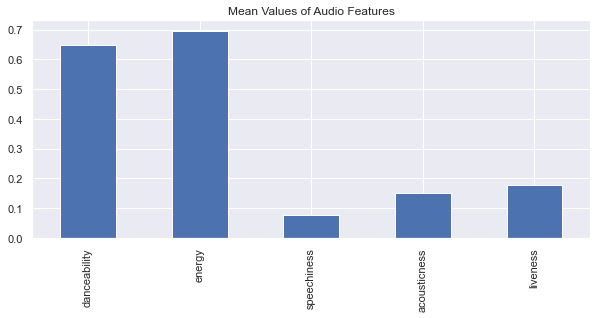

In [155]:
small = df15[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

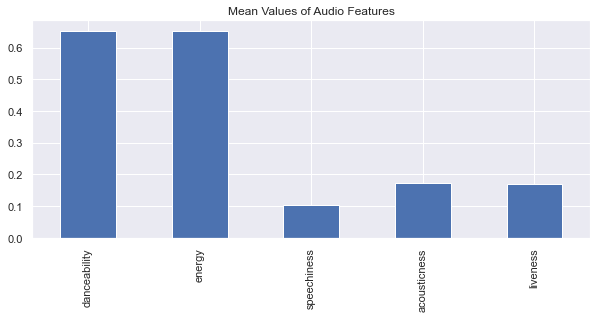

In [156]:
small = df16[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

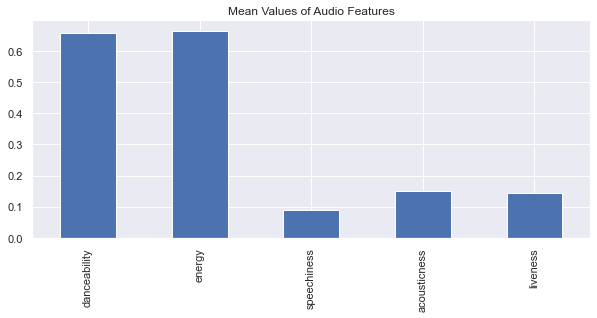

In [157]:
small = df17[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

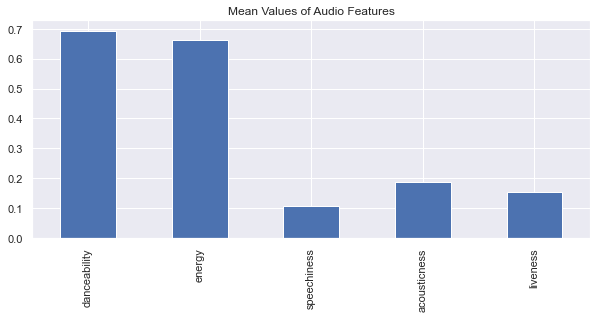

In [158]:
small = df18[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

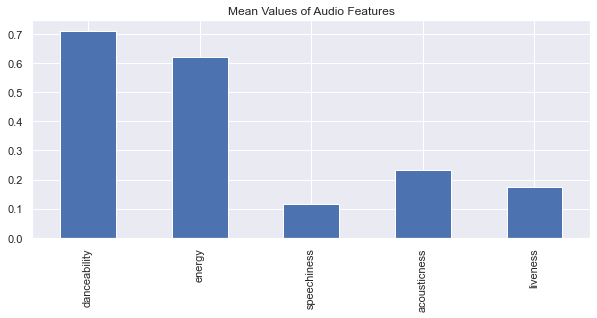

In [159]:
small = df19[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

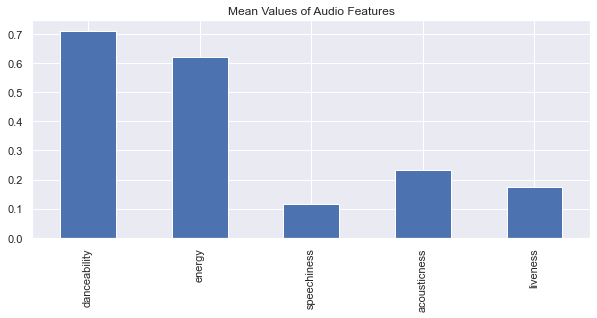

In [160]:
small = df20[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

## From the above visuals it can be inferred that on average all top songs have more danceability and energy, and less speechiness feature.

### The dataset contains a lot of audio features so to get a brief overview of it I can plot a histogram for all the features.
### To get the histogram for each attribute I will run a loop. The code is as follows —

### for 2015

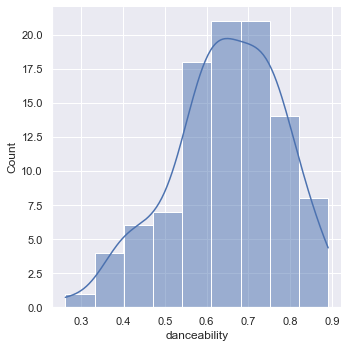

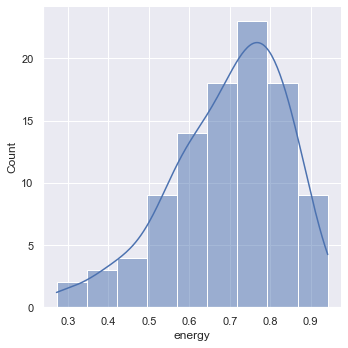

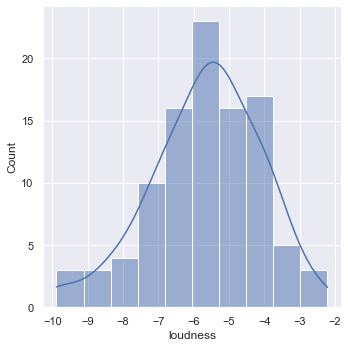

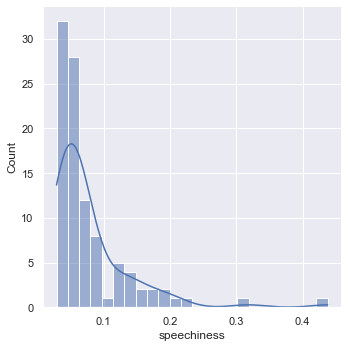

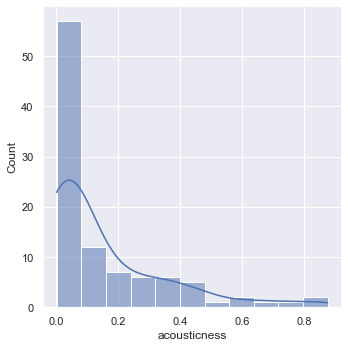

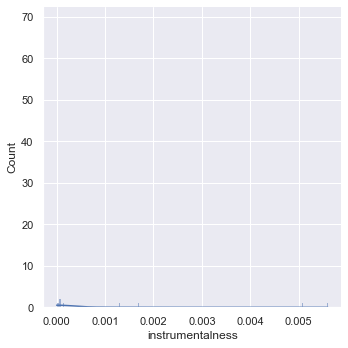

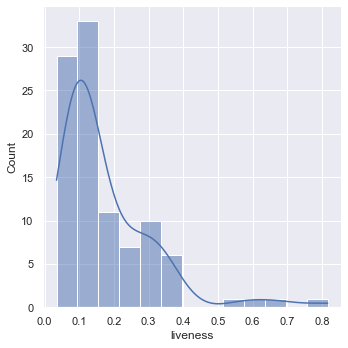

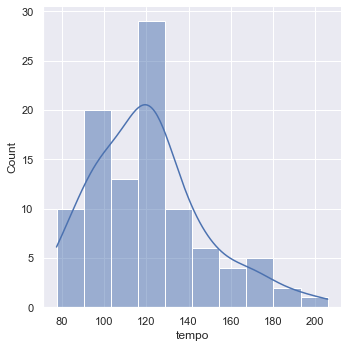

In [162]:
import seaborn as sns
from collections import Counter
import calplot
sns.set()
# fetching a list of song features
features = ['danceability', 'energy', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness','tempo']

# plotting histogram for each feature
for col in features:
  sns.displot(df15, x=col, kde=True)
  plt.show()

### 2016

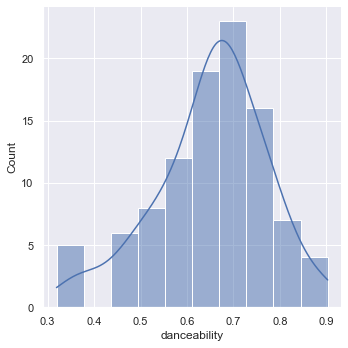

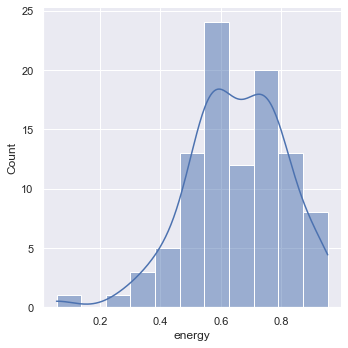

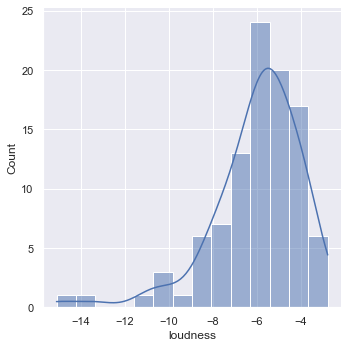

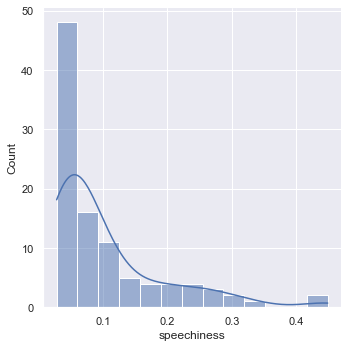

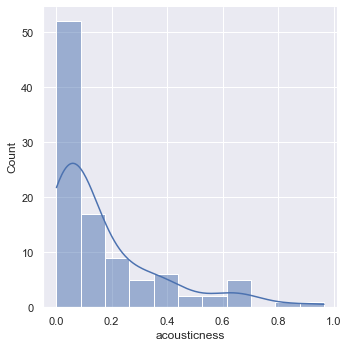

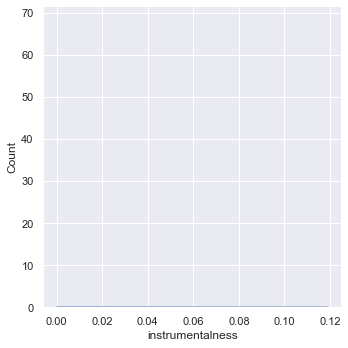

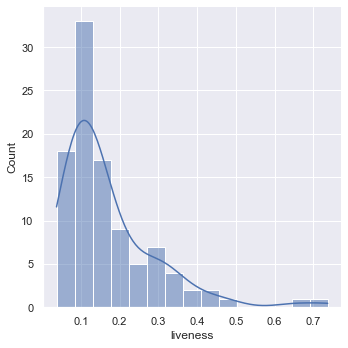

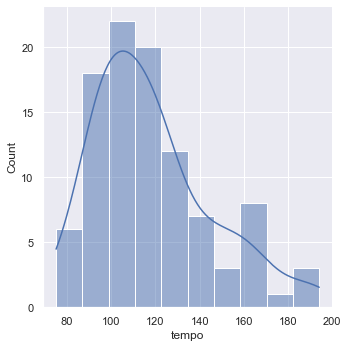

In [163]:
import seaborn as sns
from collections import Counter
import calplot
sns.set()
# fetching a list of song features
features = ['danceability', 'energy', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness','tempo']

# plotting histogram for each feature
for col in features:
  sns.displot(df16, x=col, kde=True)
  plt.show()

### 2017

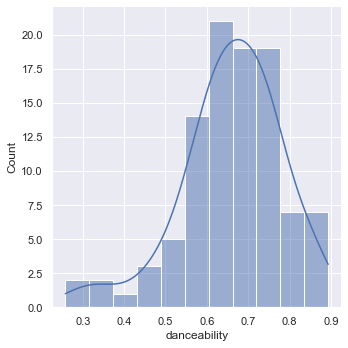

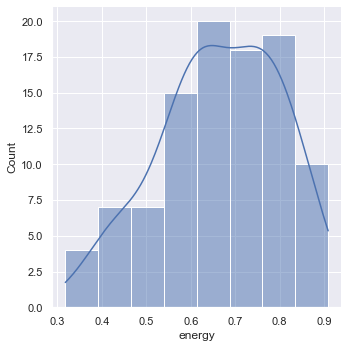

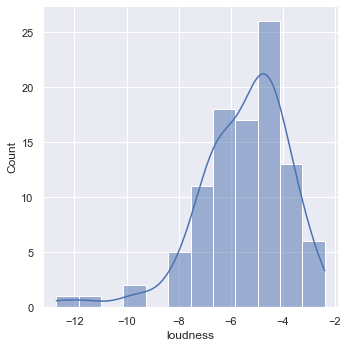

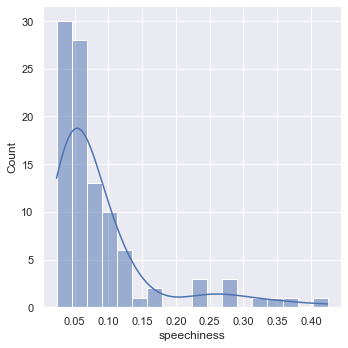

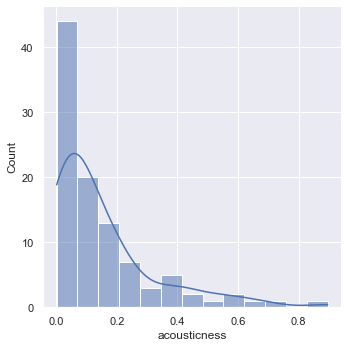

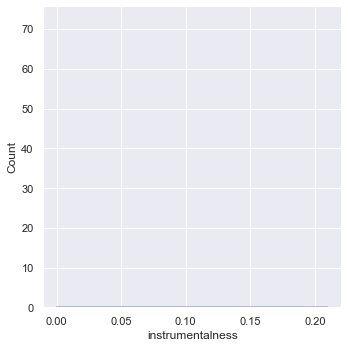

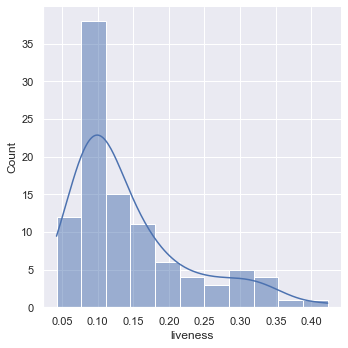

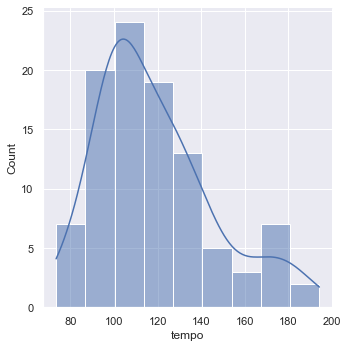

In [164]:

# fetching a list of song features
features = ['danceability', 'energy', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness','tempo']

# plotting histogram for each feature
for col in features:
  sns.displot(df17, x=col, kde=True)
  plt.show()

### 2018

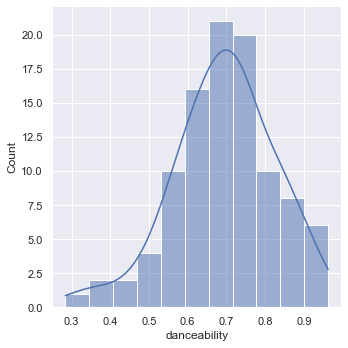

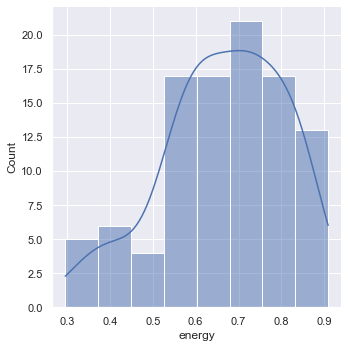

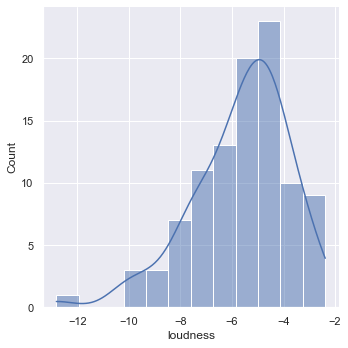

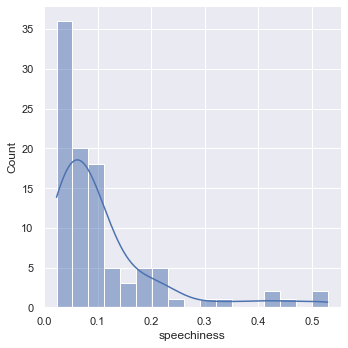

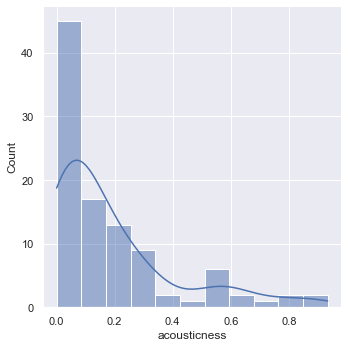

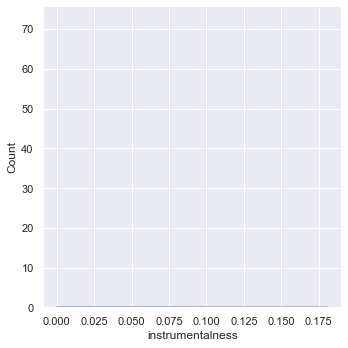

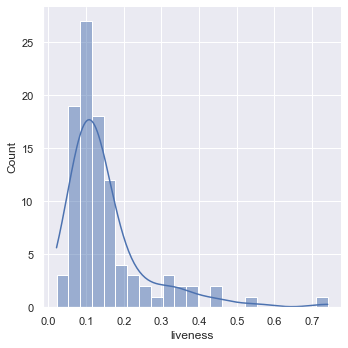

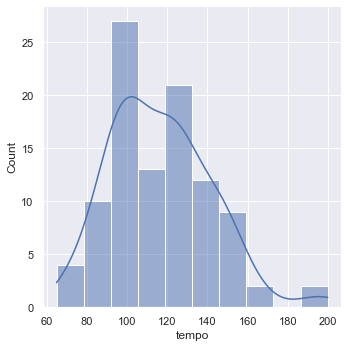

In [165]:
# fetching a list of song features
features = ['danceability', 'energy', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness','tempo']

# plotting histogram for each feature
for col in features:
  sns.displot(df18, x=col, kde=True)
  plt.show()

### 2019

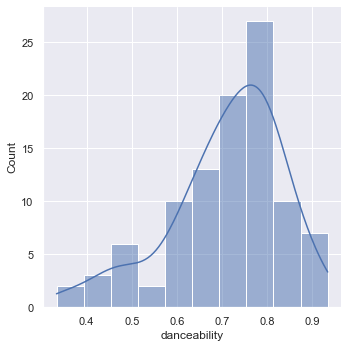

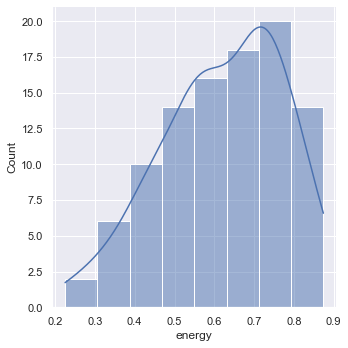

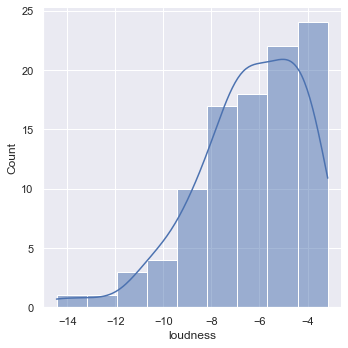

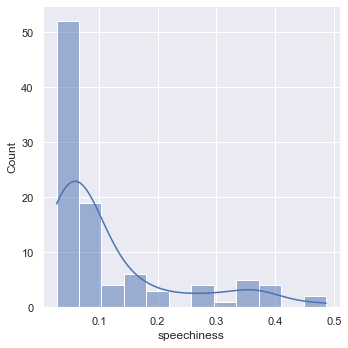

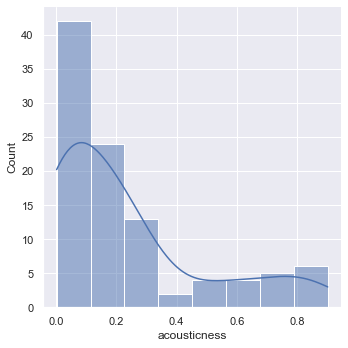

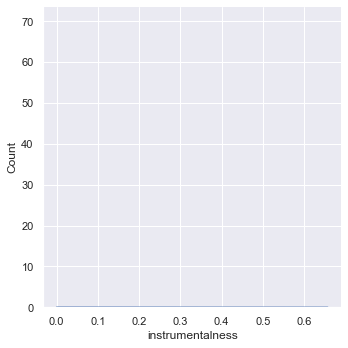

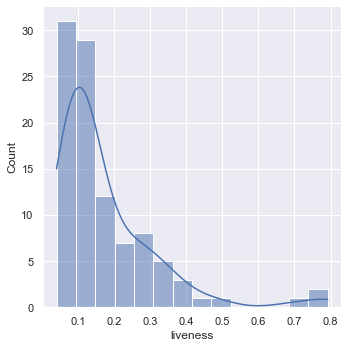

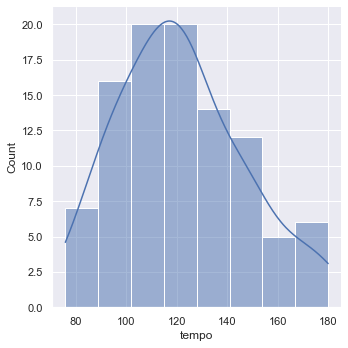

In [166]:

# fetching a list of song features
features = ['danceability', 'energy', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness','tempo']

# plotting histogram for each feature
for col in features:
  sns.displot(df19, x=col, kde=True)
  plt.show()

### 2020

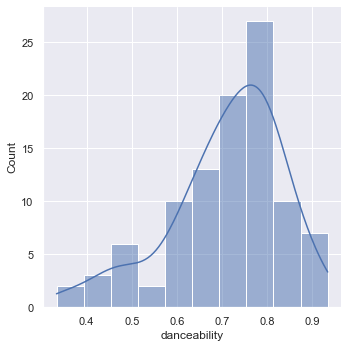

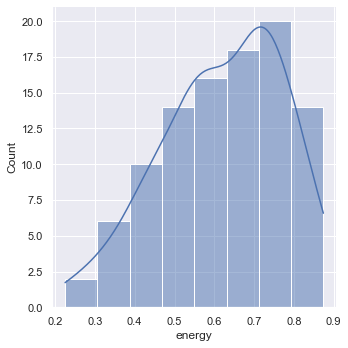

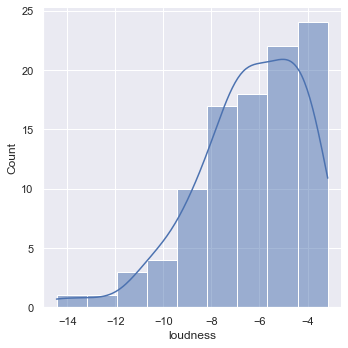

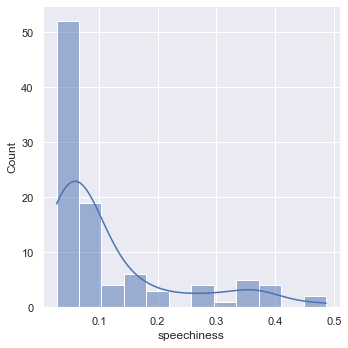

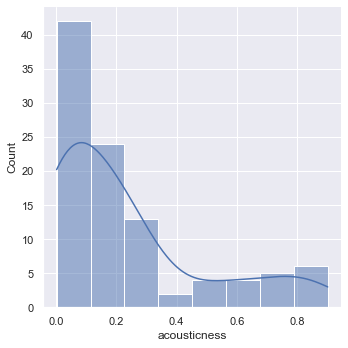

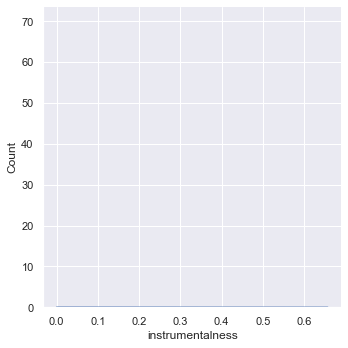

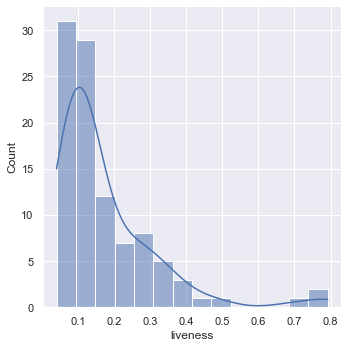

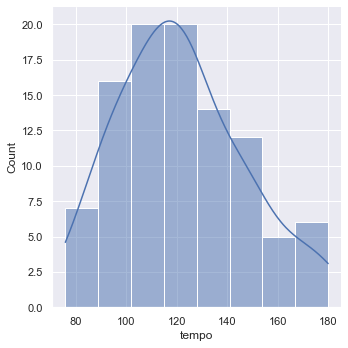

In [167]:
# fetching a list of song features
features = ['danceability', 'energy', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness','tempo']

# plotting histogram for each feature
for col in features:
  sns.displot(df20, x=col, kde=True)
  plt.show()

In [168]:
df15.columns

Index(['name', 'album', 'artist', 'release_date', 'year', 'month', 'length',
       'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature', 'key', 'mode', 'valence'],
      dtype='object')

## Tempo
Each song has its defined tempo. I will plot a histogram to visualize the count of songs belonging to each tempo.
Additionally, the dataset includes the major and minor modes of the songs. We can also segregate the graph based on different modes using the following code —

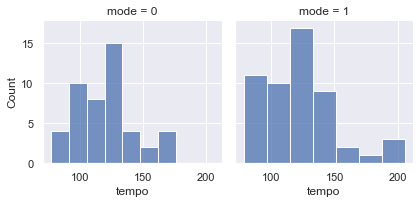

In [169]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(df15, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

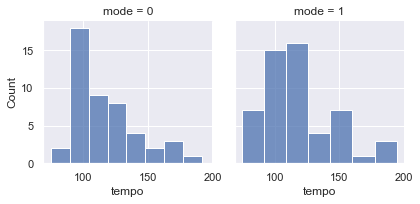

In [170]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(df16, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

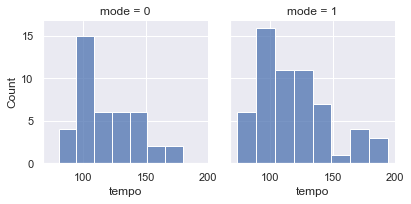

In [171]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(df17, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

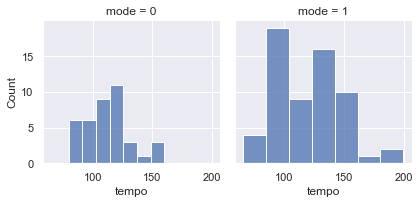

In [172]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(df18, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

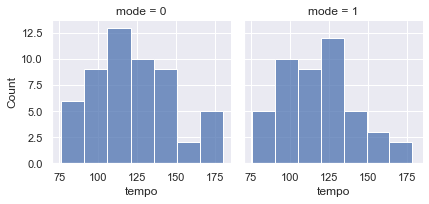

In [173]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(df19, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

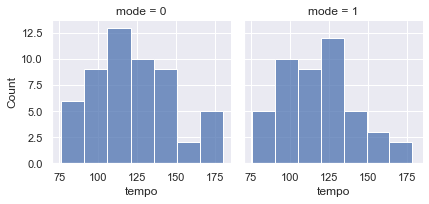

In [174]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(df20, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

## While going through the song list I observed that not all songs were released in the same year. Some belonged to the previous years.

### Year 2015

In [175]:

# grouping the songs by year to get the sum
release_year15 = df15.groupby('year', as_index=False)['name'].count()
release_year15


,year,name
0,2014,23
1,2015,71
2,2016,4
3,2017,1
4,2018,1


### Year 2016

In [176]:

# grouping the songs by year to get the sum
release_year16 = df16.groupby('year', as_index=False)['name'].count()
release_year16


,year,name
0,2017,26
1,2018,73
2,2019,1


### Year 2017

In [177]:
# grouping the songs by year to get the sum
release_year17 = df17.groupby('year', as_index=False)['name'].count()
release_year17

,year,name
0,2016,17
1,2017,80
2,2018,2
3,2019,1


### Year 2018

In [178]:

# grouping the songs by year to get the sum
release_year18 = df18.groupby('year', as_index=False)['name'].count()
release_year18


,year,name
0,2017,26
1,2018,73
2,2019,1


### Year 2020

In [179]:
# grouping the songs by year to get the sum
release_year20 = df20.groupby('year', as_index=False)['name'].count()
release_year20

,year,name
0,2015,1
1,2016,1
2,2019,24
3,2020,74


### Year 2019

In [180]:

# grouping the songs by year to get the sum
release_year19 = df19.groupby('year', as_index=False)['name'].count()
release_year19


,year,name
0,2015,1
1,2016,1
2,2019,24
3,2020,74


From the above list it can be inferred that not all songs belong to the same year. While majority of the songs belong the the same year say 2016 for which the playlist was created. many are from previous years. And for some reason atleat 1 song from following year too.

## Pivot table
### Different artists have different pitches, loudness, tempo, etc. Key is also a major factor in music.
#### With the help of the pivot table, I can get the average key of songs that were sung/created by them.

In [217]:
table = pd.pivot_table(df,index=['artist'], values = ['key'], aggfunc=np.mean)
table

,key
artist,
21 Savage,9.0
24kGoldn,7.0
5 Seconds of Summer,7.0
6ix9ine,1.0
AJR,5.0
...,...
Zara Larsson,5.5
Zedd,7.0
benny blanco,6.0


## Heatmap
There are many characteristic features of songs in the dataset. If there is any relationship between the song features or not can be determined using a heatmap. This will help to better understand music peculiarities.

<AxesSubplot:>

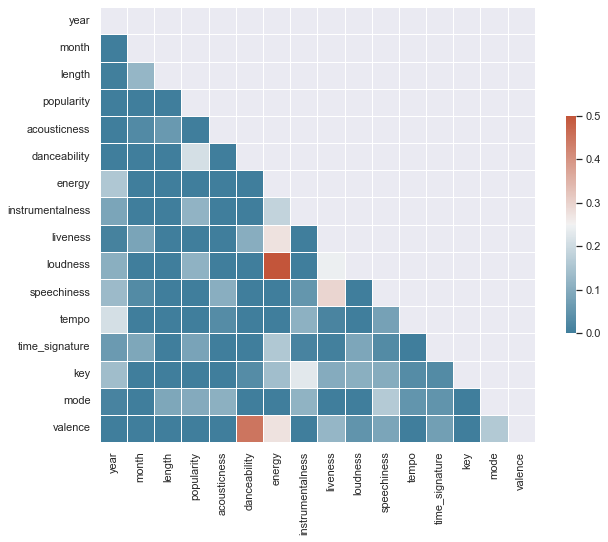

In [183]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df15.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df15.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### From the above heatmap, it can be inferred that there is a huge correlation between the following variables —
- energy x loudness
- energy x liveness
- liveness x speechiness
- dancebility x acousticness

<AxesSubplot:>

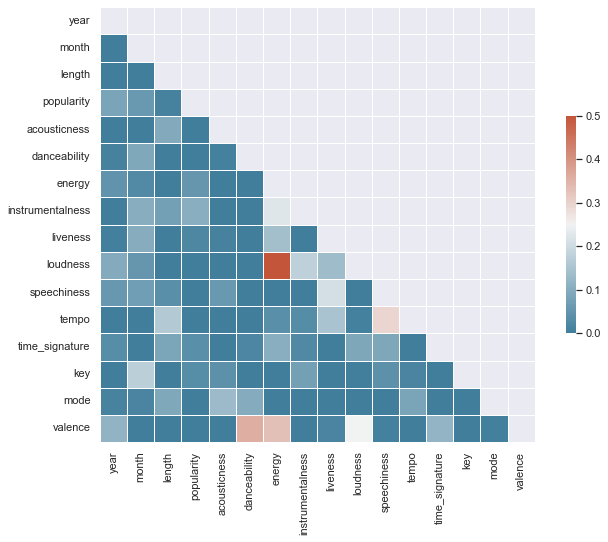

In [184]:
# yeAR 2016
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df16.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df16.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### From the above heatmap, it can be inferred that there is a huge correlation between the following variables —
- energy x loudness
- tempo x speechiness


<AxesSubplot:>

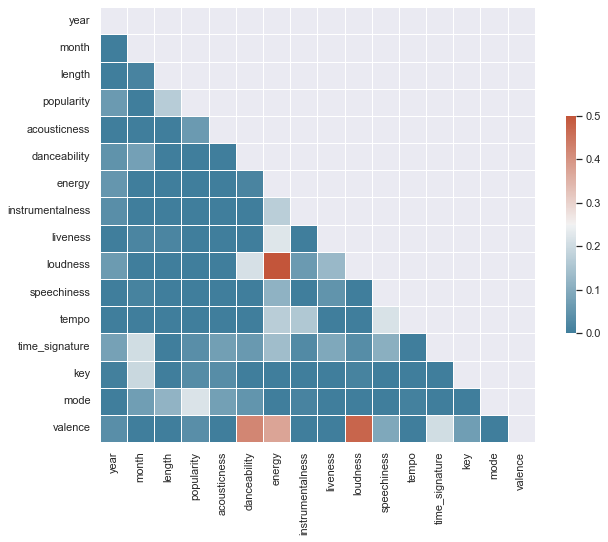

In [185]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df17.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df17.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### From the above heatmap, it can be inferred that there is a huge correlation between the following variables —
- energy x loudness
- energy x liveness
- dancebility x loudness

<AxesSubplot:>

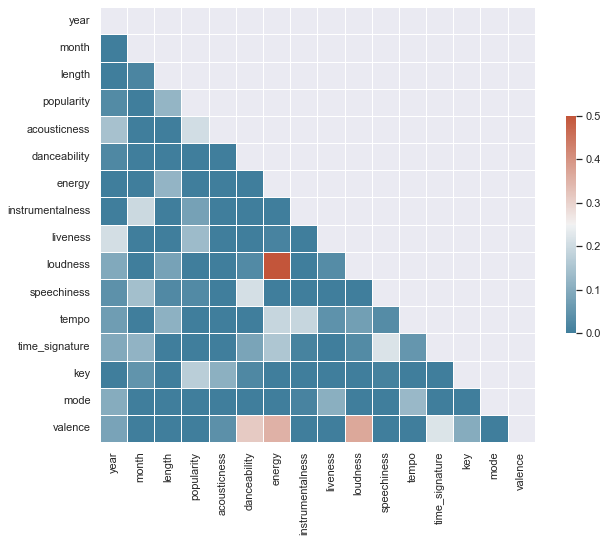

In [186]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df18.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df18.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### From the above heatmap, it can be inferred that there is a huge correlation between the following variables —
- energy x loudness
- energy x tempo
- time_signature x speechiness

<AxesSubplot:>

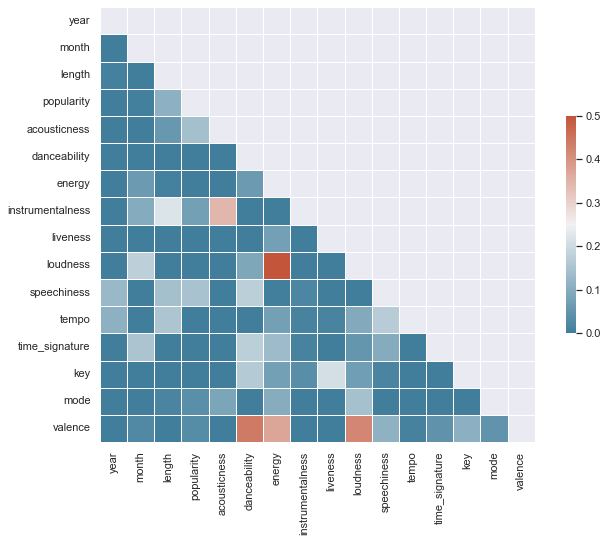

In [187]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df19.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df19.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### From the above heatmap, it can be inferred that there is a huge correlation between the following variables —
- energy x loudness
- instrumentalness x acousticness

<AxesSubplot:>

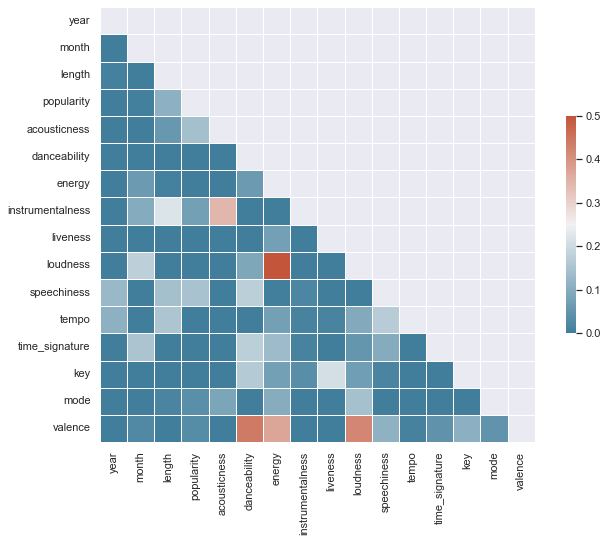

In [188]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df20.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df20.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### From the above heatmap, it can be inferred that there is a huge correlation between the following variables —
- energy x loudness
- instrumentalness x acousticness

## From looking at all the above heatmaps it can be inferred that all the top songs have huge corelation between <b>loudness and energy</b>

## Scatterplot
Scatterplots are also a great way to determine a relationship between two variables. So I will be plotting it for the variables for which we found the strong correlation above. Additionally, I will also add Mode in the plot to get the analysis as per major and minor modes.

<AxesSubplot:xlabel='danceability', ylabel='tempo'>

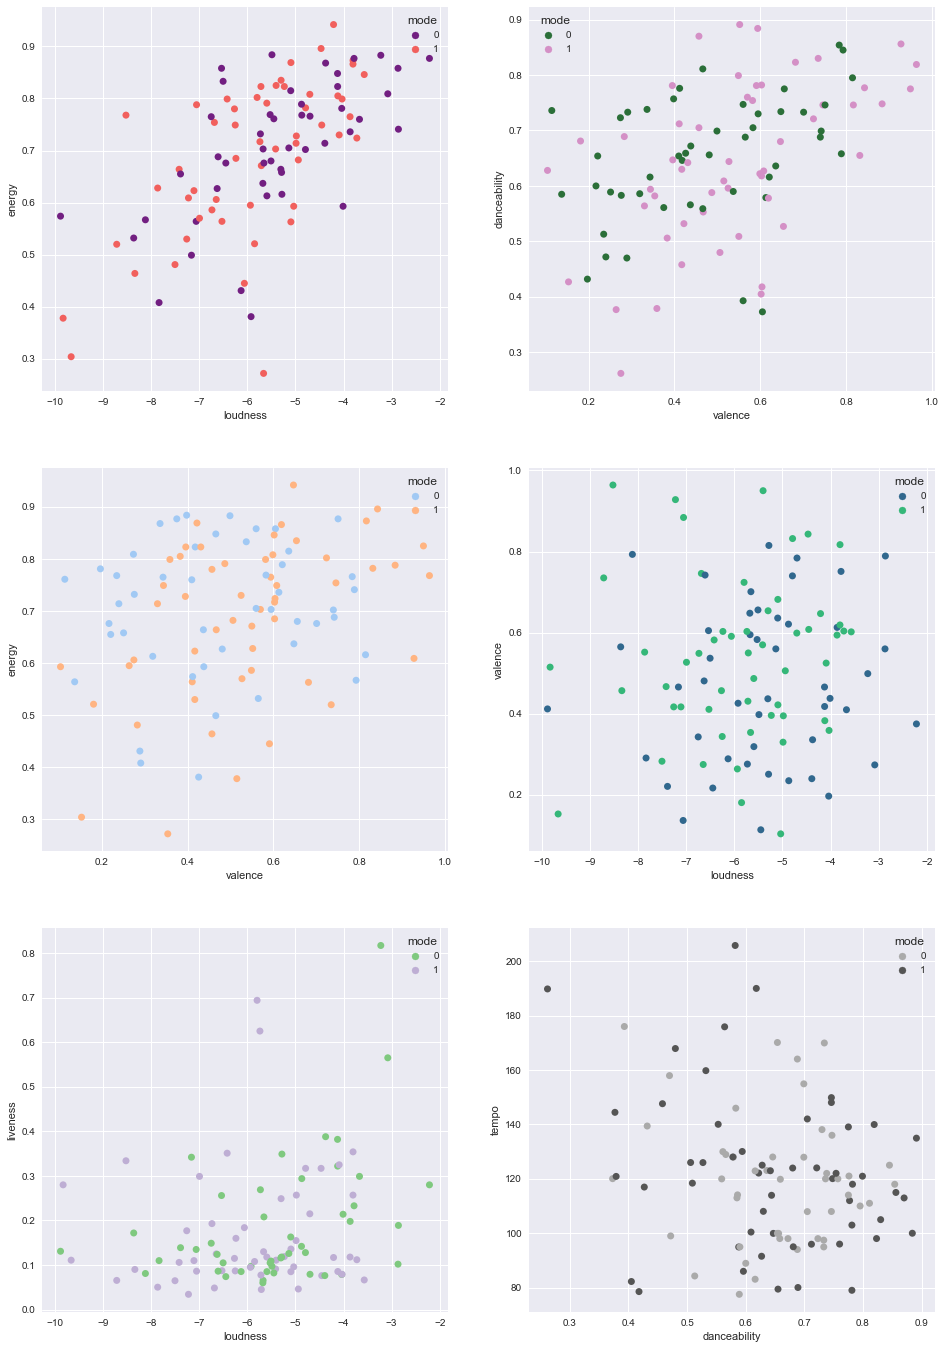

In [236]:

f, ax = plt.subplots(3,2, figsize=(16,24))

sns.scatterplot(x="loudness", y="energy",
                hue="mode", 
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=df15, ax=ax[0][0])

sns.scatterplot(x="valence", y="danceability",
                hue="mode", 
                palette="cubehelix",
                sizes=(1, 8), linewidth=0,
                data=df15, ax=ax[0][1])

sns.scatterplot(x="valence", y="energy",
                hue="mode", 
                palette="pastel",
                sizes=(1, 8), linewidth=0,
                data=df15, ax=ax[1][0])

sns.scatterplot(x="loudness", y="valence",
                hue="mode", 
                palette="viridis",
                sizes=(1, 8), linewidth=0,
                data=df15, ax=ax[1][1])

sns.scatterplot(x="loudness", y="liveness",
                hue="mode", 
                palette="Accent",
                sizes=(1, 8), linewidth=0,
                data=df15, ax=ax[2][0])

sns.scatterplot(x="danceability", y="tempo",
                hue="mode", 
                palette="binary",
                sizes=(1, 8), linewidth=0,
                data=df15, ax=ax[2][1])

### Music has 12 keys, so we can get the count of songs for each key and mode using a barplot
We can simply use a countplot to get this output with mode as hue.


<AxesSubplot:xlabel='key', ylabel='count'>

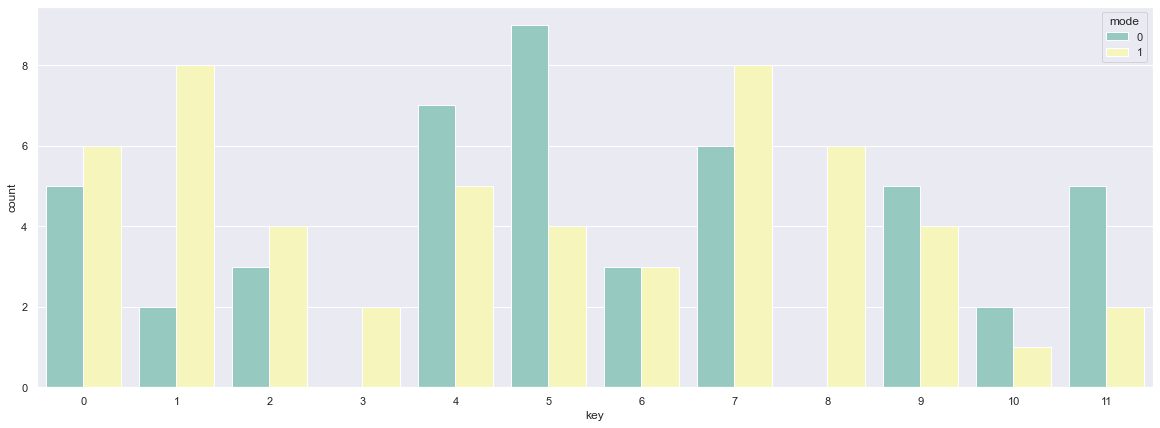

In [189]:
sns.countplot(data=df15, x='key', hue='mode', palette = 'Set3')


## Joining DataFrames

In [211]:
frames = [df15,df16,df17,df18,df19,df20]
df = pd.concat(frames, sort=False, ignore_index=True)
df


,name,album,artist,release_date,year,month,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,key,mode,valence
0,Uptown Funk (feat. Bruno Mars),Uptown Special,Mark Ronson,2015-01-12,2015,1,269666,82,0.00801,0.856,0.609,0.000082,0.0344,-7.223,0.0824,114.988,4,0,1,0.928
1,Thinking out Loud,x (Deluxe Edition),Ed Sheeran,2014-06-21,2014,6,281560,83,0.47400,0.781,0.445,0.000000,0.1840,-6.061,0.0295,78.998,4,2,1,0.591
2,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),Wiz Khalifa,2015-01-01,2015,1,229525,81,0.36900,0.689,0.481,0.000001,0.0649,-7.503,0.0815,80.025,4,10,1,0.283
3,What Do You Mean?,Purpose (Deluxe),Justin Bieber,2015-11-13,2015,11,205680,78,0.59000,0.845,0.567,0.001420,0.0811,-8.118,0.0956,125.020,4,5,0,0.793
4,Lean On (feat. MØ & DJ Snake),Peace Is The Mission : Extended,Major Lazer,2015-11-27,2015,11,176561,74,0.00346,0.723,0.809,0.001230,0.5650,-3.081,0.0625,98.007,4,7,0,0.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,I’m Ready (with Demi Lovato),I’m Ready (with Demi Lovato),Sam Smith,2020-04-16,2020,4,200838,67,0.00346,0.501,0.674,0.000036,0.2820,-6.363,0.0408,155.051,4,5,1,0.152
596,HOLIDAY,HOLIDAY,Lil Nas X,2020-11-13,2020,11,154997,83,0.12000,0.810,0.511,0.000000,0.0832,-6.924,0.1640,151.947,4,5,0,0.837
597,goosebumps,Birds In The Trap Sing McKnight,Travis Scott,2016-09-16,2016,9,243836,86,0.08470,0.841,0.728,0.000000,0.1490,-3.370,0.0484,130.049,4,7,1,0.430
598,Mood Swings (feat. Lil Tjay),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,2020,7,213333,81,0.48700,0.480,0.602,0.000000,0.0848,-6.335,0.3680,179.798,4,10,0,0.269


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              600 non-null    object        
 1   album             600 non-null    object        
 2   artist            600 non-null    object        
 3   release_date      600 non-null    datetime64[ns]
 4   year              600 non-null    int64         
 5   month             600 non-null    int64         
 6   length            600 non-null    int64         
 7   popularity        600 non-null    int64         
 8   acousticness      600 non-null    float64       
 9   danceability      600 non-null    float64       
 10  energy            600 non-null    float64       
 11  instrumentalness  600 non-null    float64       
 12  liveness          600 non-null    float64       
 13  loudness          600 non-null    float64       
 14  speechiness       600 non-

## Q) How release year has affected track features?

## Plotting Relationships Between Release_Year and track Features¶

In [213]:
## checking if index are duplicates
df[df.index.duplicated()]



,name,album,artist,release_date,year,month,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,key,mode,valence


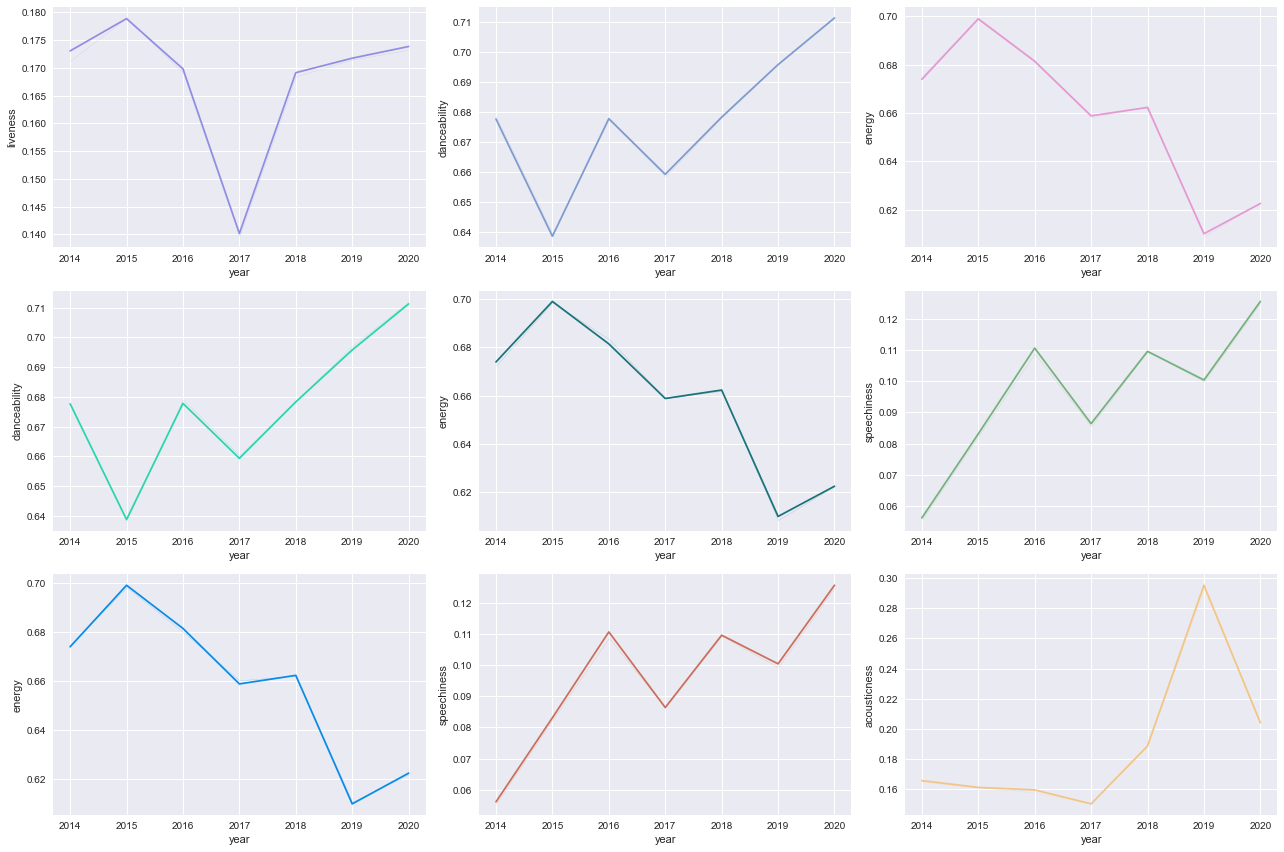

In [215]:
features_to_plot = ['liveness' , 'danceability' , 'energy' , 'speechiness' , 'acousticness' , 'instrumentalness' , 'valence','loudness' , 'tempo']
fig,ax = plt.subplots(3,3 , figsize =(18,12))
for i in range(3):
    for j in range(3):
        color = np.random.rand(3,)
        sns.lineplot(data = df ,x = 'year' , y = features_to_plot[i+j] , ax = ax[i][j] , color = color, ci = False)
plt.tight_layout()
plt.show()

## Q) What Features of songs affect the popularity of songs.

In [229]:
import plotly.express as px   #importing plotly
fig2 = px.scatter(df, x="popularity", y="danceability", color="danceability",size='popularity')
fig2.show()

## Dancebility Does not affect popularity

In [231]:
import plotly.express as px   #importing plotly
fig2 = px.scatter(df, x="popularity", y="valence", color="valence",size='popularity')
fig2.show()

## Q) Has duration of songs changed over the years?

## Lets see how durition of songs have chaged over the years.

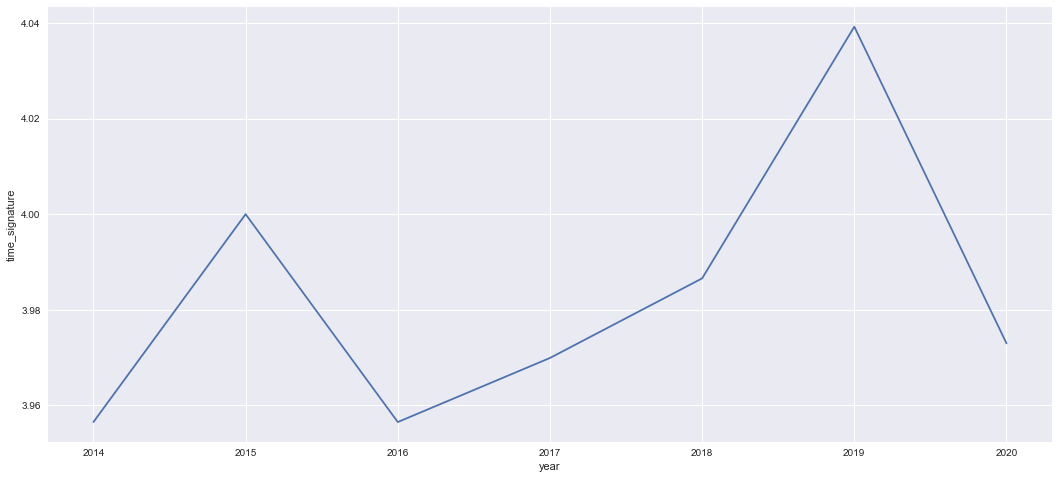

In [216]:
plt.figure(figsize = (18,8))
sns.lineplot(x = 'year' , y = 'time_signature' , data = df , ci = False)
plt.show()

I will also determine the songsbelonging to each key.
Simply with the bar plot, I can get the number of songs in each key.

c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0, flags=flags)


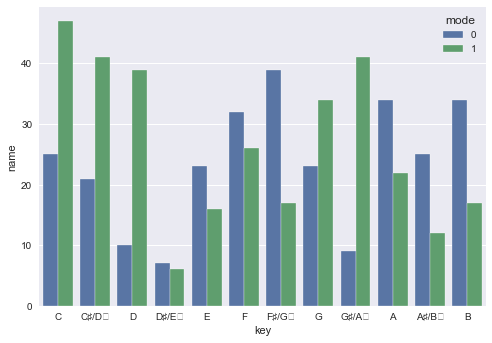

In [205]:
key_mode = df.groupby(["key","mode"], as_index=False)["name"].count()

# map the key in number to the real key represented in alphabet
key_dic = {0: "C", 
           1: "C♯/D♭",
           2: "D",
           3: "D♯/E♭",
           4: "E",
           5: "F",
           6: "F♯/G♭",
           7: "G",
           8: "G♯/A♭",
           9: "A",
           10: "A♯/B♭",
           11: "B"}
key_mode = key_mode.replace({"key": key_dic})

sns.barplot(data=key_mode, x='key', y='name', hue='mode')
plt.show()

## Q) Is there a corelation between different features?

## Valence and Energy¶

The correlation between valence and energy shows us that there is a conglomeration of songs with high energy and a low level of valence. This means that many of my energetic songs sound more negative with feelings of sadness, anger and depression. 

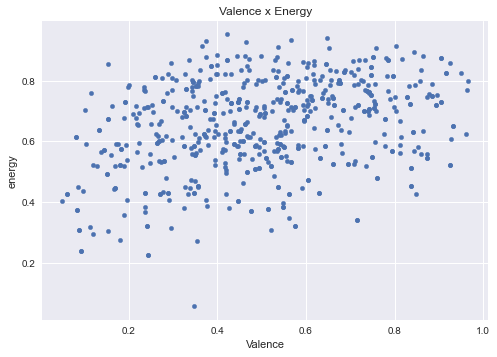

In [199]:
from matplotlib import style

fig, ax = plt.subplots()
df.plot(kind='scatter',x='valence', y='energy',ax = ax , colormap = 'Accent_r' ,title="Valence x Energy")
ax.set_xlabel("Valence")
plt.show()

## Valence and Danceability
Now, looking at the relationship between valence and danceability we can see that songs have high values of danceability split in the first and second quadrant of the plot. 

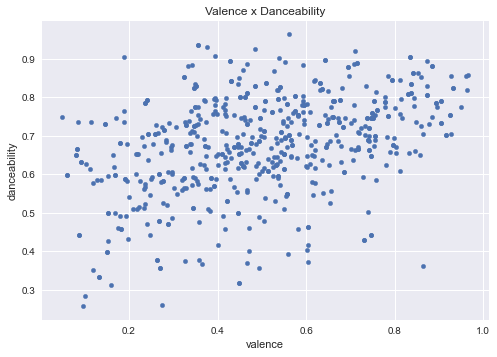

In [201]:
fig,ax = plt.subplots()
df.plot(kind = 'scatter', x = 'valence', y = 'danceability',ax = ax, colormap = 'Accent_r', title = 'Valence x Danceability')
plt.show()

## How does different features of a song impact it's popularity?
We get an intuition that large audiences like songs that are compatible with dancing. Let's see if we can back this up with data as well.

In [218]:
df_1=df.groupby('popularity')['danceability'].mean().sort_values(ascending=[False]).reset_index()
df_1.head()

,popularity,danceability
0,32,0.885000
1,51,0.828000
2,56,0.813000
3,83,0.792947
4,33,0.776000


But Thats not the case.

In [237]:
df_1=df.groupby('popularity')['energy'].mean().sort_values(ascending=[False]).reset_index()
df_1.head()

,popularity,energy
0,57,0.8435
1,50,0.8380
2,89,0.8160
3,34,0.8150
4,43,0.8080


Lets Import another playlist with top tiktok songs from 2017 till date

In [221]:
## Geting tiktok Playlist

def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Vanessa', '2vvCxv5GAT1oO4bu8lLegi') # tiktok  songs
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  key = features[0]['key']
  mode = features[0]['mode']
  valence = features[0]['valence']


  track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature,key,mode,valence]
  return track
  
import time
import pandas as pd
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
dft = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 
'popularity',  'acousticness', 'danceability', 'energy', 'instrumentalness', 
'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','key','mode','valence'])
dft

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,key,mode,valence
0,Life Letters,Life Letters,Never Get Used To People,2018-12-07,148040,66,0.8430,0.441,0.692,0.000002,0.0981,-4.945,0.1200,92.302,4,10,0,0.416
1,No Idea,Heaven Or Hell,Don Toliver,2020-03-13,154424,81,0.5240,0.652,0.631,0.000579,0.1650,-5.718,0.0893,127.998,4,6,0,0.350
2,My Heart Went Oops,My Heart Went Oops,Tiagz,2020-01-29,128925,56,0.1190,0.960,0.412,0.000000,0.0903,-11.281,0.6070,121.027,4,1,1,0.490
3,Walk Man,Walk Man,Tiny Meat Gang,2019-06-07,165937,63,0.3310,0.928,0.696,0.000119,0.1210,-4.972,0.0866,94.994,4,4,0,0.396
4,They Call Me Tiago (Her Name Is Margo),They Call Me Tiago (Her Name Is Margo),Tiagz,2020-02-27,154455,61,0.1960,0.878,0.578,0.433000,0.0965,-7.581,0.0722,100.996,4,0,1,0.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,I Hear a Symphony,Flying,Cody Fry,2017-10-06,185176,75,0.9250,0.207,0.243,0.034200,0.1180,-8.181,0.0306,171.648,4,10,1,0.394
96,Maneater,Loose,Nelly Furtado,2006-01-01,258893,81,0.0261,0.796,0.777,0.000358,0.1210,-4.810,0.0397,132.722,4,6,1,0.787
97,Cupid's Chokehold / Breakfast in America,The Papercut Chronicles,Gym Class Heroes,2005-02-22,243773,79,0.2370,0.720,0.744,0.000000,0.2550,-6.938,0.1200,78.953,4,1,0,0.619
98,Best Friend,Best Friend,Rex Orange County,2017-01-25,262231,79,0.3950,0.575,0.714,0.000000,0.1150,-5.247,0.0596,144.982,4,6,1,0.320


In [238]:
df_2=dft.groupby('popularity')['tempo'].mean().sort_values(ascending=[False]).reset_index()
df_2.head()

,popularity,tempo
0,69,169.9780
1,82,159.8455
2,67,150.0850
3,40,149.9810
4,58,145.0130


In [244]:
df_2=dft.groupby('danceability')['popularity'].mean().sort_values(ascending=[False]).reset_index()
df_2.head()

,danceability,popularity
0,0.949,85.0
1,0.749,84.0
2,0.773,83.0
3,0.764,83.0
4,0.247,82.0


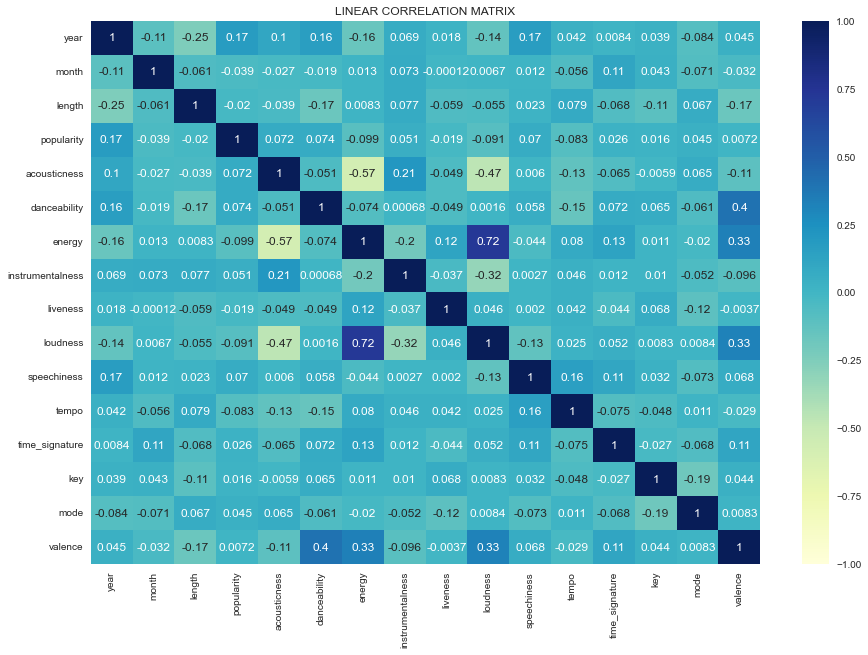

In [225]:
# Plot linear correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX')
plt.show()

In [226]:
import plotly.express as px   #importing plotly
fig2 = px.scatter(df, x="popularity", y="danceability", color="danceability",size='popularity')
fig2.show()